In [41]:
import numpy as np

#def fixed point iterative function phi(x)
def phi(x):
    return (20 - 2*x**2 - x**3)/10

#def fixed point iterative function psi(x)
def psi(x):
    return np.cbrt(20 - 10*x - 2*x**2)

#def stfs speed-up of phi(x)
def spdphi(x):
    return x - (phi(x)-x)**2/(phi(phi(x))-2*phi(x)+x)

#def stfs speed-up of psi(x)
def spdpsi(x):
    return x - (psi(x)-x)**2/(psi(psi(x))-2*psi(x)+x)    

#def polynomial p(x)
def poly(x):
    return x**3 + 2*x**2 + 10*x -20

#def derpolynomial p'(x)
def der(x):
    return 3*x**2 + 4*x + 10

#def newton iterative function
def newt(x):
    return x-poly(x)/der(x)

#def iteration process
def iter_process(x0,fn,threshold,max_steps):
    x = x0
    cnt_iter = 0
    for i in range(max_steps):
        cnt_iter += 1
        x = fn(x)
        if np.abs(poly(x)) < threshold:
            break
    return x,cnt_iter

In [43]:
x0 = 1.3688081078
for fn in [phi,psi,spdphi,spdpsi,newt]:
    solution, steps = iter_process(x0,fn,1e-13,100000)
    print("{} iteration ends after {} steps, with output value {}".format(fn.__name__,steps,np.real(solution)))

phi iteration ends after 100000 steps, with output value 0.548946478054766
psi iteration ends after 100000 steps, with output value -3.162277660168379
spdphi iteration ends after 1 steps, with output value 1.3688081078213727
spdpsi iteration ends after 1 steps, with output value 1.3688081078213727
newt iteration ends after 1 steps, with output value 1.3688081078213727


In [53]:
import matplotlib.pyplot as plt

#def iteration process
def plot_iter_process(x0,fn,threshold,max_steps):
    x = x0
    cnt_iter = 0
    scatters = []
    for i in range(max_steps):
        cnt_iter += 1
        x = fn(x)
        scatters.append([cnt_iter,x])
        if np.abs(poly(x)) < threshold:
            break
    cnt, value = zip(*scatters)
    plt.scatter(cnt, value, s = 10)
    plt.title('$\{}$'.format(fn.__name__))
    plt.xlabel('iteration steps')
    plt.ylabel('$x_k$ value')
    plt.show()

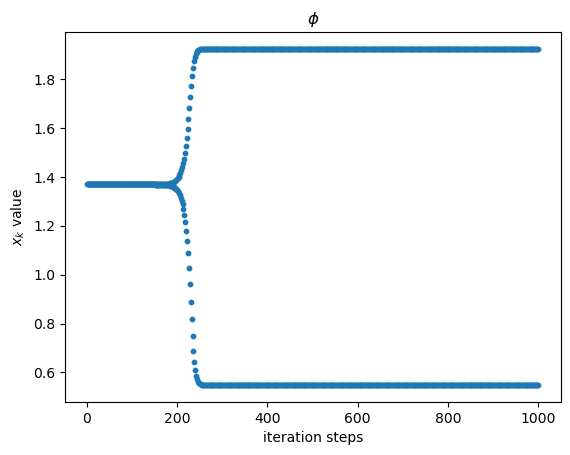

In [59]:
 plot_iter_process(x0,phi,1e-13,1000)

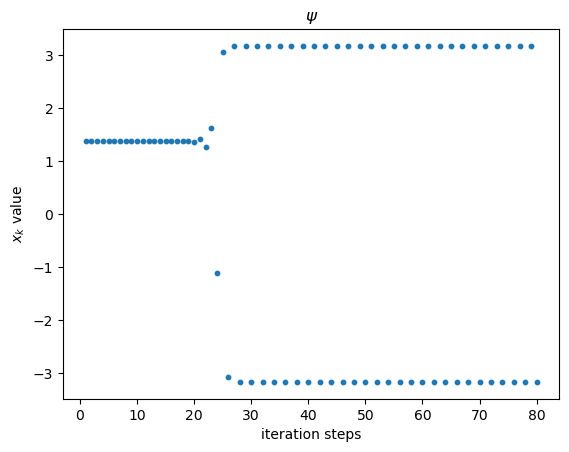

In [61]:
plot_iter_process(x0,psi,1e-13,80)